In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('loan_sanction_train.csv')

In [3]:

df_train.shape

(614, 13)

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:

df_train["Dependents"].fillna(2)

0       0
1       1
2       2
3       2
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 981, dtype: object

In [6]:

df_train["ApplicantIncome"].fillna(5403.459283)

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [7]:

df_train["CoapplicantIncome"].fillna(1621.245798)

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64

In [8]:

df_train["LoanAmount"].fillna(146.412162)

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [9]:

df_train["Loan_Amount_Term"].fillna(342.00)

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [10]:
df_train.mean()

<ipython-input-10-9f4e3ea3a1c4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.mean()


ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [11]:

df_train["Married"].fillna("Yes")

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [12]:

df_train["Self_Employed"].fillna("No")

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [13]:
print(df_train.dtypes)
print(df_train.describe())

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max      

In [14]:
print("Number of duplicates: ",df_train.duplicated().sum())


Number of duplicates:  0


In [15]:
print("\nPercentages of missing values:\n\n",round(df_train.isna().sum())/df_train.shape[0]*100,2)


Percentages of missing values:

 Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64 2


In [16]:
df_train.select_dtypes('object').nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

In [17]:
# dropping Loan_Id as it has no information to provide
df_train.drop(columns = ['Loan_ID'],inplace = True)

# checking for cardinality
df_train.select_dtypes('number').nunique()

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
dtype: int64

In [ ]:
#Loan_Amount_Term" and "Credit_History" have low cardinality and should be treated as categorical features rather than numerical ones.

In [18]:
print("Loan_Amount_Term Value counts:\n",df_train['Loan_Amount_Term'].value_counts())
print("\nCredit_History Value counts:\n",df_train['Credit_History'].value_counts())

Loan_Amount_Term Value counts:
 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Credit_History Value counts:
 1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [19]:
def loan_amount(x):
    if pd.notna(x):
        if int(x)>=360:
            return '>=360'
        elif int(x)<360:
            return '<360'
    else:
        return x

# for it's low cardinality we will treat Loan_amount_term as categorical feature, we will also try to handle the imbalance of the classes
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].apply(loan_amount)

# mapping target values for the sake of visualization in bivariate analysis
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y':1,'N':0})

# Converting Credit History to categorical variable
df_train['Credit_History'] = df_train['Credit_History'].map({1:'Yes',0:'No'})

In [20]:
df_train.drop('Loan_Status',axis=1).describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [21]:
df_train.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
count,601,611,599,614,582,600,564,614
unique,2,2,4,2,2,2,2,3
top,Male,Yes,0,Graduate,No,>=360,Yes,Semiurban
freq,489,398,345,480,500,527,475,233


Univariate Analysis

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

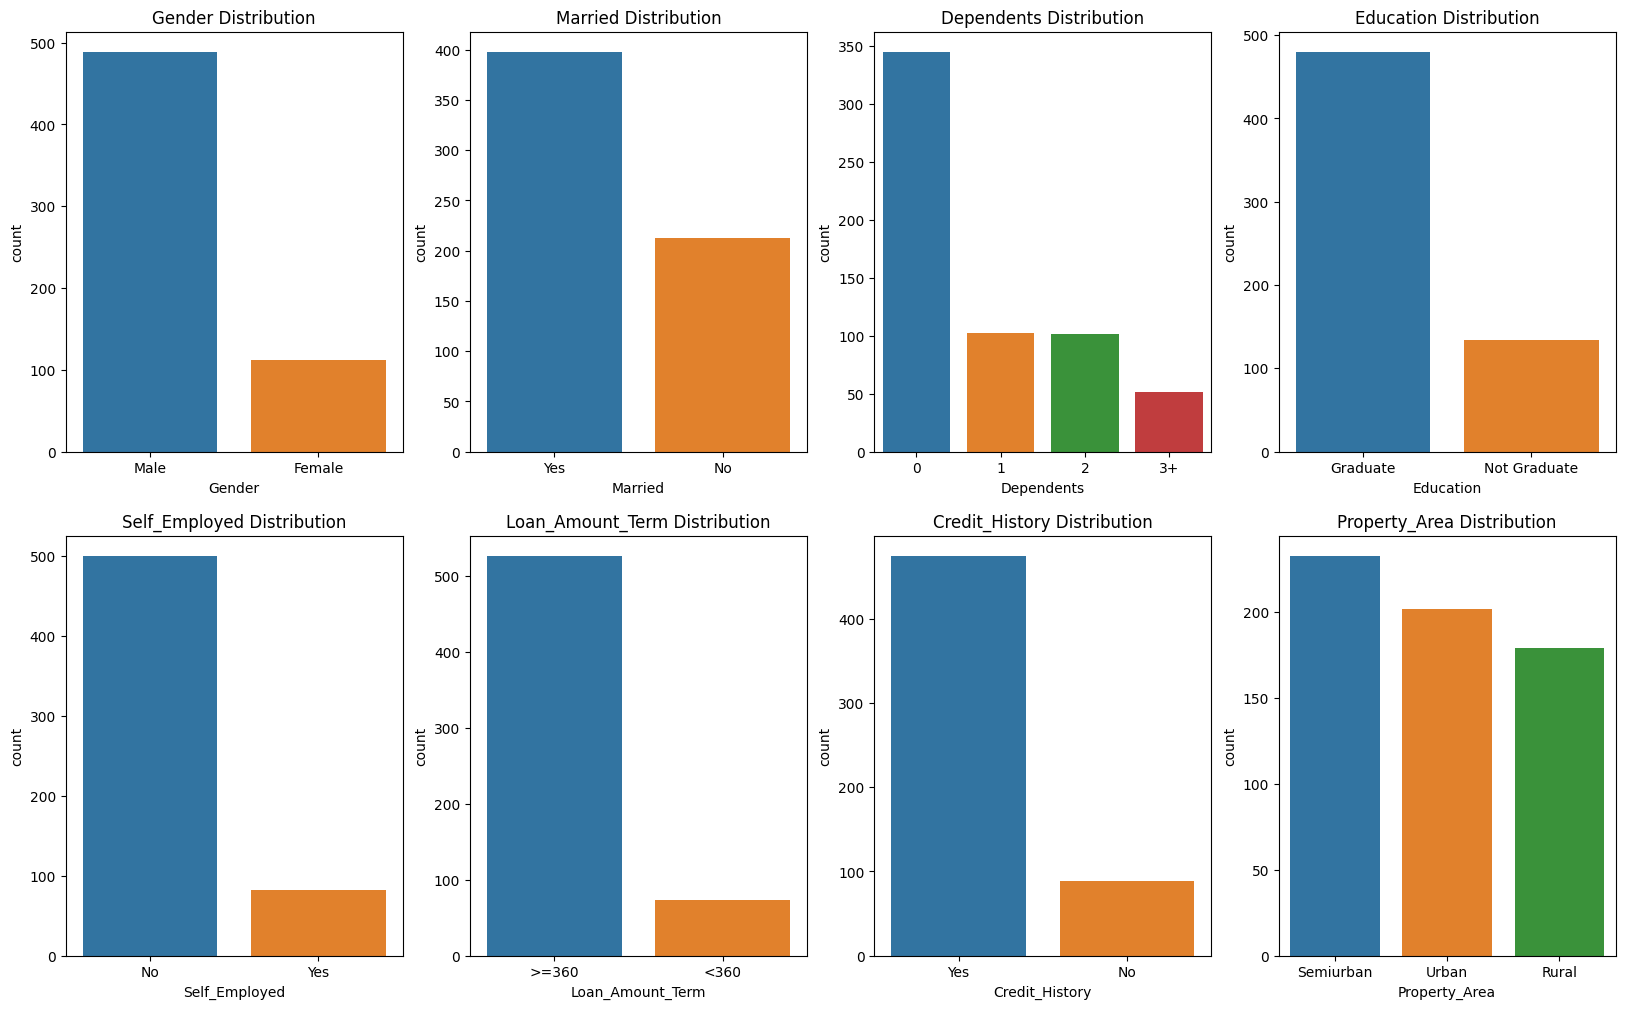

In [24]:
cat_features = df_train.select_dtypes('object').columns
fig,ax = plt.subplots(2,4,figsize=(20,12))

for i,feature in enumerate(cat_features):
    order = (
        df_train[feature]
        .value_counts(normalize = True )
        .sort_values(ascending=False).index
    )
    sns.countplot(data=df_train,x=feature,ax=ax[i//4,i%4],order = order)
    ax[i//4,i%4].set_title(f'{feature} Distribution')

General notes:

most of the applicants are males.
most of the applicants are married.
most of the applicants have no dependents.
most of the applicants are Graduates.
most of the applicants aren't self employed.
most of the loans are above 360.
most of the applicants do have a credit history.
Property area distribution is mixed with maximum no in semiurban area

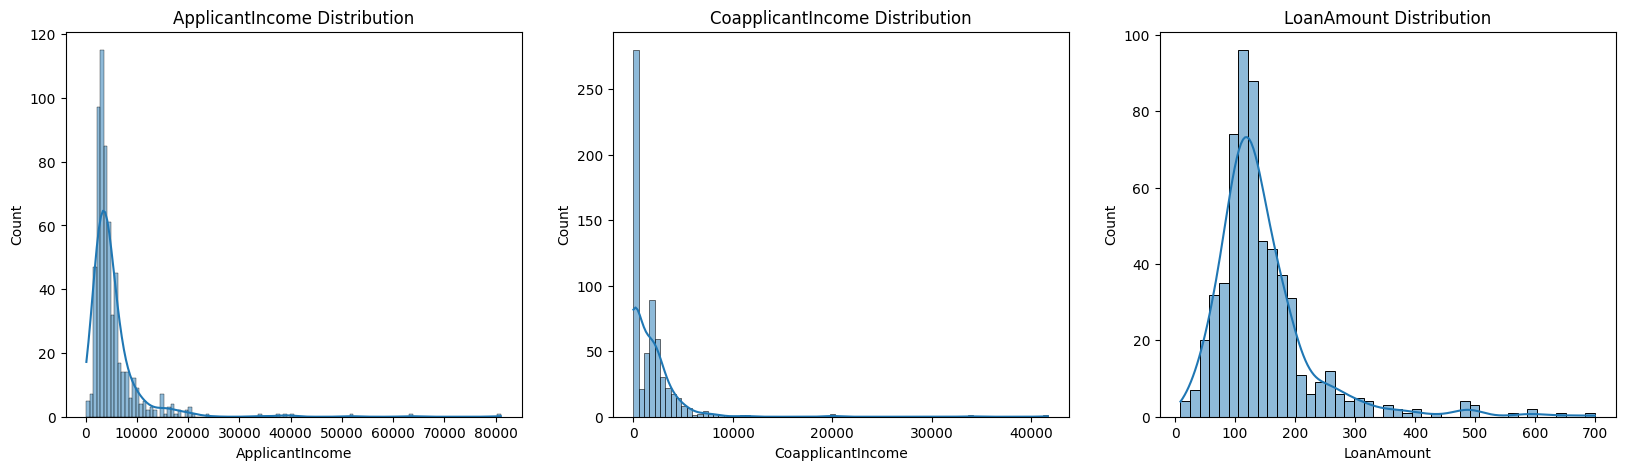

In [26]:
num_features = df_train.select_dtypes('number').columns.drop('Loan_Status')
fig,ax = plt.subplots(1,3,figsize=(20,5))

for i,feature in enumerate(num_features):
    sns.histplot(data=df_train,x=feature,ax=ax[i],kde=True)
    ax[i].set_title(f'{feature} Distribution')

As anticipated, there are significant outliers in both ApplicantIncome and CoapplicantIncome.

Handling Outliers

In [27]:
df_train[df_train['CoapplicantIncome']<10000].shape

(608, 12)

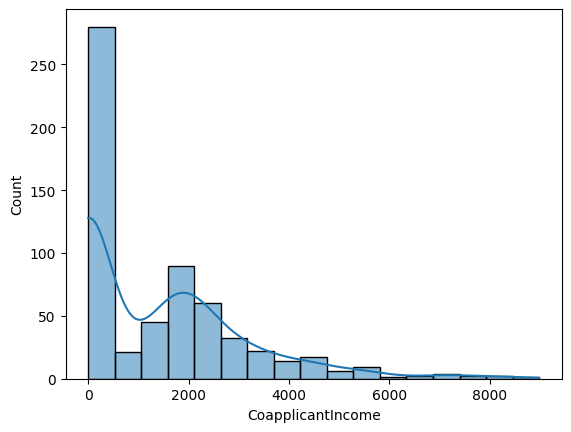

In [28]:
sns.histplot(df_train[df_train['CoapplicantIncome']<10000]['CoapplicantIncome'], kde=True);

We address outliers by employing a log transformation for LoanAmount and ApplicantIncome, while managing CoapplicantIncome by implementing a threshold approach.

In [29]:
import numpy as np

In [30]:
df_train = df_train[df_train['CoapplicantIncome']<10000]

for col in ['LoanAmount','ApplicantIncome']:
    df_train[col] = df_train[col].apply(np.log1p)

<ipython-input-30-a8c6ff4a0b71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].apply(np.log1p)


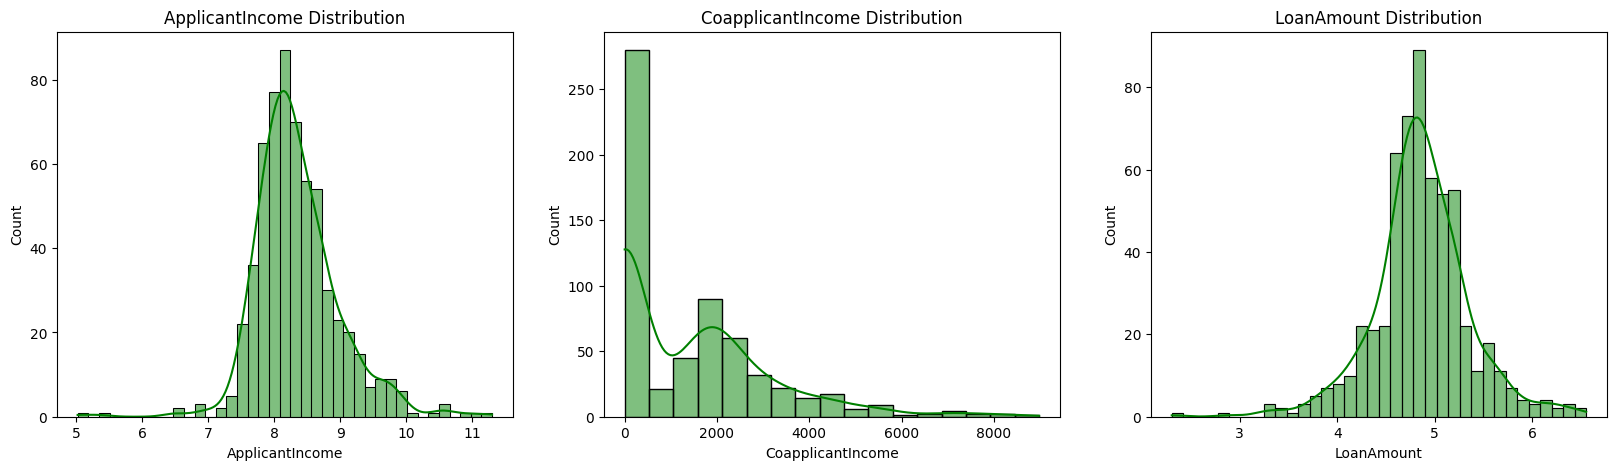

In [32]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

for i,feature in enumerate(num_features):
    sns.histplot(data=df_train,x=feature,ax=ax[i],kde=True,color='Green')
    ax[i].set_title(f'{feature} Distribution')

Target Distribution

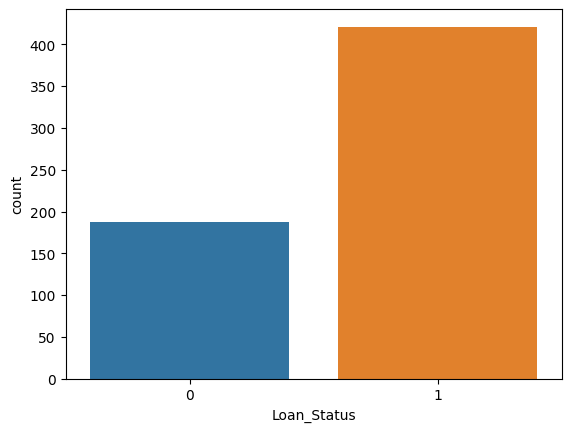

In [33]:
sns.countplot(data=df_train,x='Loan_Status');

The imbalance in target classes necessitates the consideration of metrics such as the F1 score. In our scenario, placing a greater emphasis on precision is crucial, as erroneously approving loans that should be declined could result in significant losses for the bank.

Bivariate Analysis

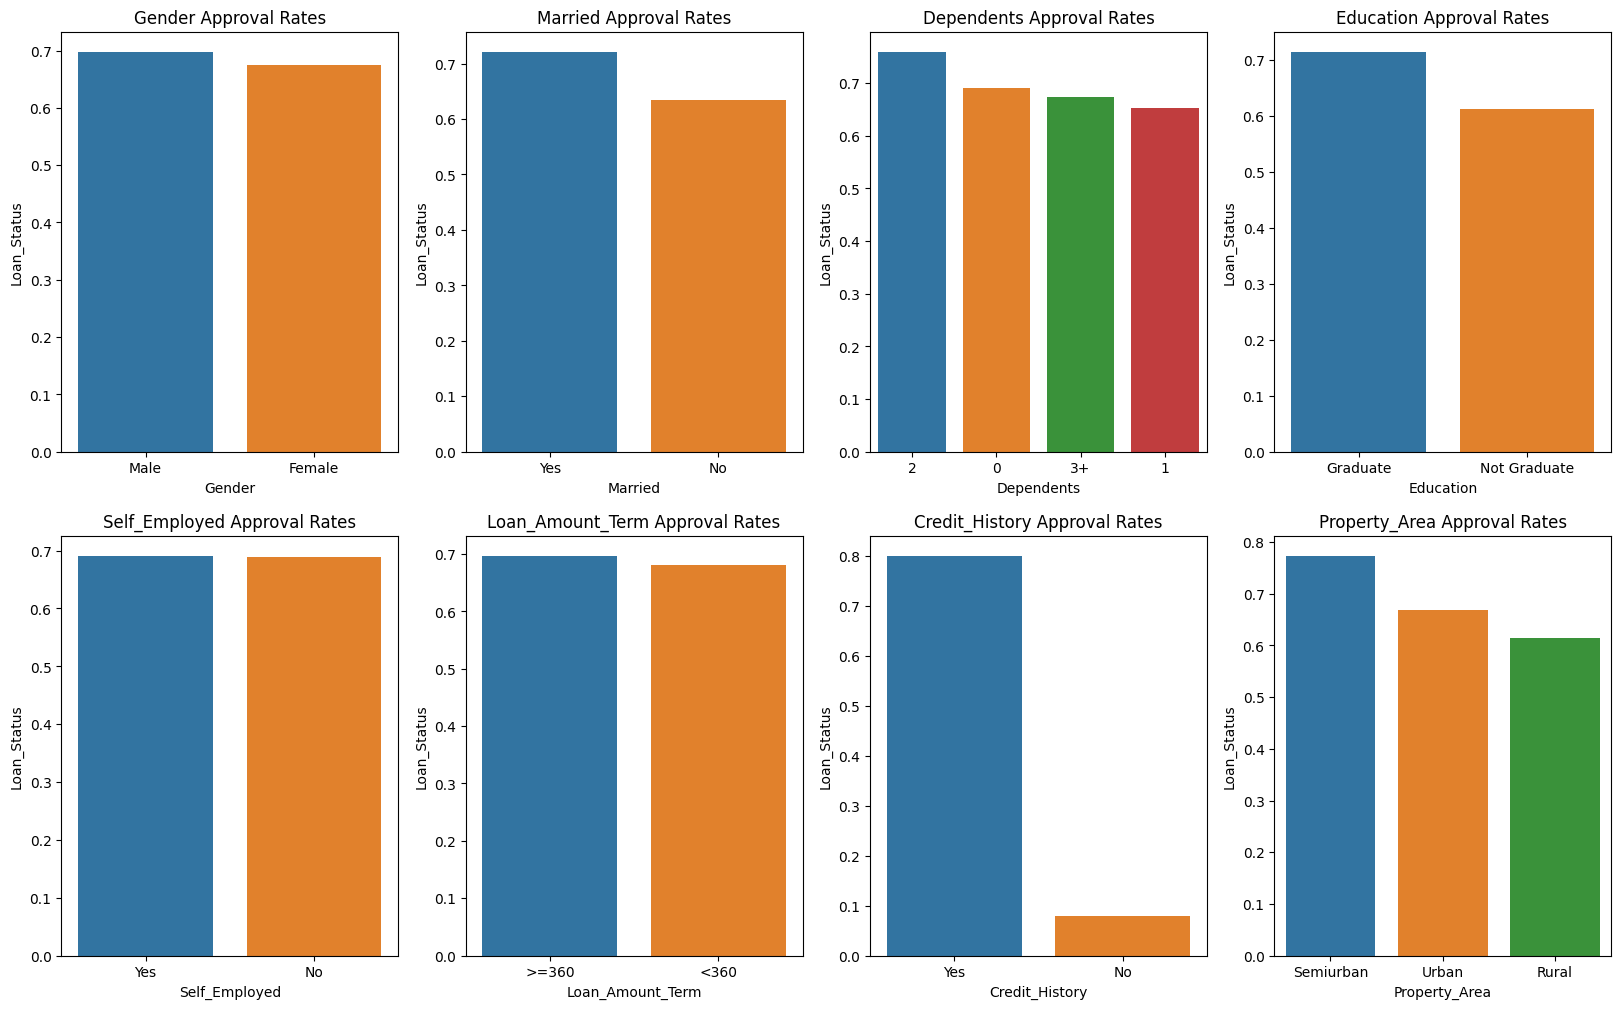

In [34]:
fig,ax = plt.subplots(2,4,figsize=(20,12))

for i,feature in enumerate(cat_features):
    order = (
        df_train.groupby(feature)['Loan_Status']
        .mean()
        .sort_values(ascending=False)
        .index
    )
    sns.barplot(df_train,x=feature,y='Loan_Status',errorbar=None,ax=ax[i//4,i%4],order=order);
    ax[i//4,i%4].set_title(f'{feature} Approval Rates')

General observations:

Marital status, education, and property area exhibit a weak correlation with the target variable.
Credit history demonstrates a strong correlation with the target.
The remaining features display very weak correlations with the target variable.

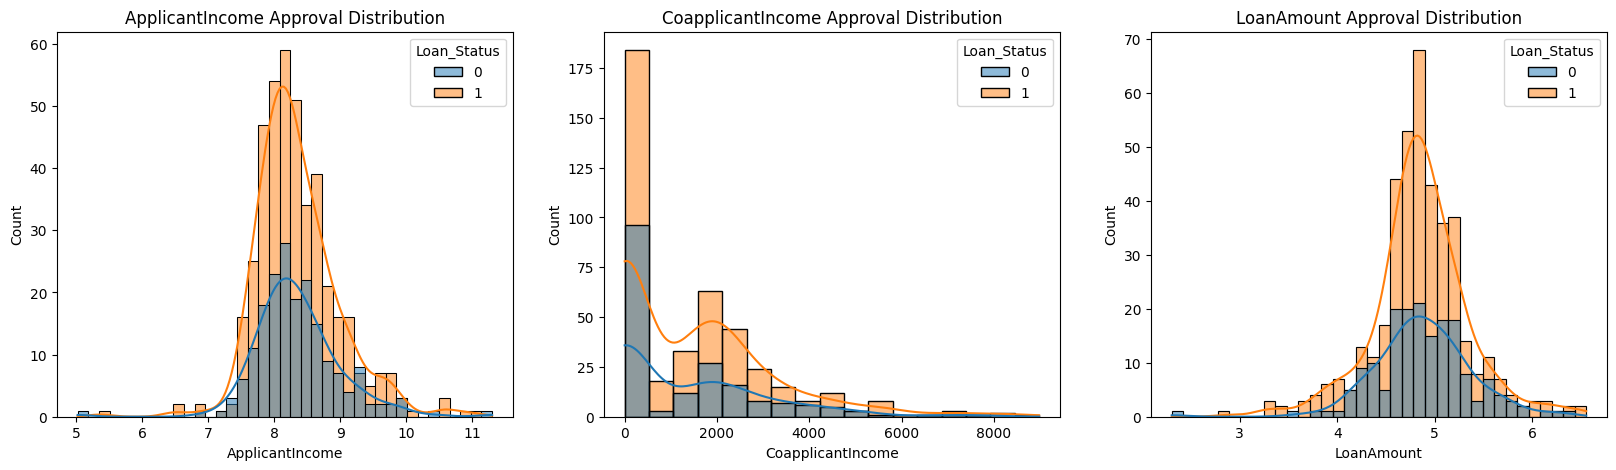

In [35]:
num_features = df_train.select_dtypes('number').columns.drop('Loan_Status')
fig,ax = plt.subplots(1,3,figsize=(20,5))

for i,feature in enumerate(num_features):
    sns.histplot(data=df_train,x=feature,ax=ax[i],kde=True,hue="Loan_Status")
    ax[i].set_title(f'{feature} Approval Distribution')

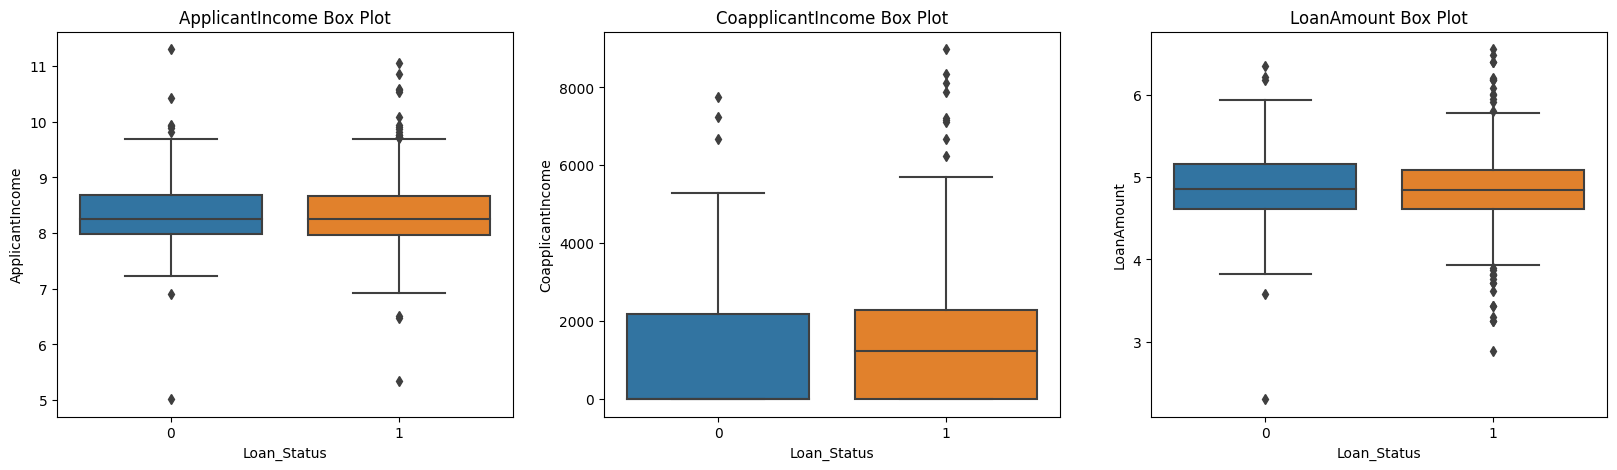

In [36]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

for i,feature in enumerate(num_features):
    sns.boxplot(data=df_train,x="Loan_Status",y=feature,ax=ax[i])
    ax[i].set_title(f'{feature} Box Plot')

<ipython-input-37-8dfadc55796b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True,cmap='Blues');


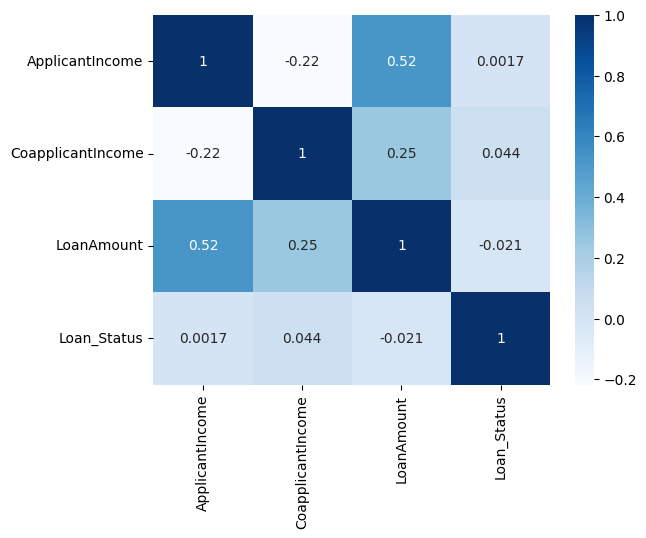

In [37]:
sns.heatmap(df_train.corr(),annot=True,cmap='Blues');

Modelling

In [38]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674197,0.0,NaN,>=360,Yes,Urban,1
1,Male,Yes,1,Graduate,No,8.430327,1508.0,4.859812,>=360,Yes,Rural,0
2,Male,Yes,0,Graduate,Yes,8.006701,0.0,4.204693,>=360,Yes,Urban,1
3,Male,Yes,0,Not Graduate,No,7.857094,2358.0,4.795791,>=360,Yes,Urban,1
4,Male,No,0,Graduate,No,8.699681,0.0,4.955827,>=360,Yes,Urban,1


In [39]:
df_train['Gender'] = [1 if i =='Male' else 0 for i in df_train['Gender']]

In [40]:
df_train['Married'] = [1 if i =='Yes' else 0 for i in df_train['Married']]

In [41]:
df_train['Education'] = [1 if i =='Graduate' else 0 for i in df_train['Education']]

In [42]:
df_train['Self_Employed'] = [1 if i =='Yes' else 0 for i in df_train['Self_Employed']]

In [43]:
df_train['Property_Area'] = [1 if i =='Urban' else 0 for i in df_train['Property_Area']]

In [44]:
df_train = df_train[df_train['Dependents'] != '3+']

In [45]:
df_train['Credit_History'] = [1 if i =='Yes' else 0 for i in df_train['Credit_History']]

In [46]:

df_train["Credit_History"].fillna(1)

0      1
1      1
2      1
3      1
4      1
      ..
608    1
609    1
611    1
612    1
613    0
Name: Credit_History, Length: 559, dtype: int64

In [47]:
df_train['Loan_Status'] = [1 if i =='Yes' else 0 for i in df_train['Loan_Status']]

In [48]:

df_train["Loan_Status"].fillna(1)

0      0
1      0
2      0
3      0
4      0
      ..
608    0
609    0
611    0
612    0
613    0
Name: Loan_Status, Length: 559, dtype: int64

In [49]:

df_train["Dependents"].fillna(1)

0      0
1      1
2      0
3      0
4      0
      ..
608    0
609    0
611    1
612    2
613    0
Name: Dependents, Length: 559, dtype: object

In [50]:

df_train["LoanAmount"].fillna(142.511)

0      142.511000
1        4.859812
2        4.204693
3        4.795791
4        4.955827
          ...    
608      4.691348
609      4.276666
611      5.537334
612      5.236442
613      4.897840
Name: LoanAmount, Length: 559, dtype: float64

In [51]:
df_train["Loan_Amount_Term"].fillna(342.201873 , inplace = True)

In [52]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674197,0.0,NaN,>=360,1,1,0
1,1,1,1,1,0,8.430327,1508.0,4.859812,>=360,1,0,0
2,1,1,0,1,1,8.006701,0.0,4.204693,>=360,1,1,0
3,1,1,0,0,0,7.857094,2358.0,4.795791,>=360,1,1,0
4,1,0,0,1,0,8.699681,0.0,4.955827,>=360,1,1,0


In [53]:
df_train['Loan_Amount_Term'] = [1 if i == '>=360' else 0 for i in df_train['Loan_Amount_Term']]

In [54]:
result_1 = df_train.dropna()

In [55]:
result_1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64